In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd 
import seaborn as sns
import numpy as np

### chain stores

- [Top 100 retailers 2022 list](https://nrf.com/resources/top-retailers/top-100-retailers/top-100-retailers-2022-list)
- [List of restaurant chains in the US](https://en.wikipedia.org/wiki/List_of_restaurant_chains_in_the_United_States)

In [9]:
#read in the chains csv -- this dataset is self-assembled due to no existing dataset of all chain stores
df_chains = pd.read_csv("chains_datasetcsv.csv")
#527 chains

In [10]:
df_chains.head()

,chains
0,Walmart
1,Amazon.com
2,Costco Wholesale
3,The Home Depot
4,The Kroger Co.


In [11]:
#convert Series of chain_names to an numpy array
chain_names = df_chains['chains'].str.lower().to_numpy()

In [23]:
#full file path "ds-councilor-worrell-small-business/data/district2_businesses.csv"

file_path_1= "ds-councilor-worrell-small-business/data/district"
file_path_2 = "_businesses.csv"

x = []
y1 = []
y2 = []
#loops through all 9 districts 
for i in range(1, 10): # i = 1 though 9
    file_path = file_path_1 + str(i) + file_path_2
    df =pd.read_csv(file_path)
    # checks if ['business name'] has value from list of chain_names
    isInChains = df[df['business_name'].isin(chain_names)]
    #gets number of businesses in each district and the number of chain stores
    numBusinesses = df.shape[0]
    numChains = isInChains.shape[0]
    numIndependentBusinesses = numBusinesses - numChains
    x.append(i)
    y1.append(numChains)
    y2.append(numIndependentBusinesses)
    print("Number of Chains/Number of Businesses in District" + str(i) + " : " + str(numChains) + " / " + str(numBusinesses) )

Number of Chains/Number of Businesses in District1 : 6 / 309
Number of Chains/Number of Businesses in District2 : 2 / 784
Number of Chains/Number of Businesses in District3 : 7 / 546
Number of Chains/Number of Businesses in District4 : 6 / 411
Number of Chains/Number of Businesses in District5 : 8 / 568
Number of Chains/Number of Businesses in District6 : 8 / 909
Number of Chains/Number of Businesses in District7 : 1 / 461
Number of Chains/Number of Businesses in District8 : 3 / 255
Number of Chains/Number of Businesses in District9 : 17 / 695


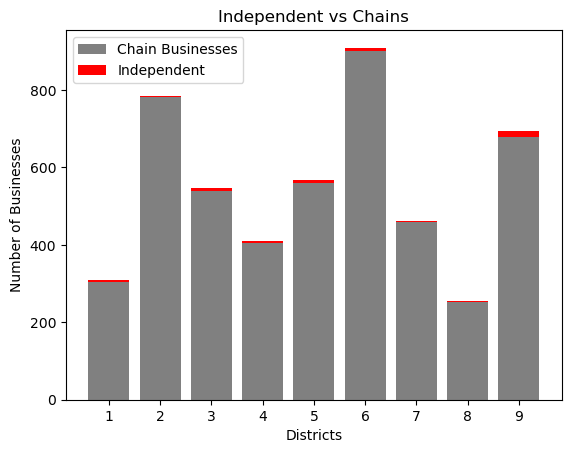

In [39]:
# plot bars in stack manner
plt.bar(x, y2, color='gray')
plt.bar(x, y1, bottom=y2, color='r')

plt.legend(['Chain Businesses', 'Independent'])
plt.title("Independent vs Chains")
plt.xlabel("Districts")
plt.ylabel("Number of Businesses")
plt.xticks(x)


plt.savefig("ChainsvsIndependentlyOwnedBusinesses")
plt.show()
